In [1]:
!pwd

/users/ashley/road2SKA


In [2]:
!git clone https://github.com/Road2SKA/projectG_supervised_latent_radiogals.git

fatal: destination path 'projectG_supervised_latent_radiogals' already exists and is not an empty directory.


In [20]:
!ls

main.ipynb  projectG_supervised_latent_radiogals  roadtoska


In [2]:
cd projectG_supervised_latent_radiogals

/users/ashley/road2SKA/projectG_supervised_latent_radiogals


In [3]:
!ls

LICENSE  README.md  classifications_horton_et_al_2025_filtered.csv  notebooks


In [4]:
!pwd

/users/ashley/road2SKA/projectG_supervised_latent_radiogals


In [8]:
!git branch

* ashley
  main


In [7]:
!git checkout -b ashley

Switched to a new branch 'ashley'


In [17]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /users/ashley/road2SKA/.git/


In [13]:
!git add .

In [14]:
!git commit -m "Adding Ashley branch -initial file commit."

On branch ashley
nothing to commit, working tree clean


In [ ]:
!git push origin ashley

In [12]:
!git config --global user.name "AshleyNyamandi"

In [11]:
!git config --global user.email "nyamandiashley@gmail.com"

In [25]:
!git pull origin main

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 444.49 KiB | 4.23 MiB/s, done.
From https://github.com/Road2SKA/projectG_supervised_latent_radiogals
 * branch            main       -> FETCH_HEAD
   4094eed..f898b38  main       -> origin/main
Updating 4094eed..f898b38
Fast-forward
 classifications_horton_et_al_2025_filtered.csv | 7608 ++++++++++++++++++++++++
 1 file changed, 7608 insertions(+)
 create mode 100644 classifications_horton_et_al_2025_filtered.csv


In [3]:
!ln -s /idia/projects/roadtoska

In [1]:
import numpy as np
import astropy
from PIL import Image
import os
import pandas as pd

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
dataroot_cutouts_asinh = f"roadtoska/LoTTS_data/"
datacutout_cutouts_asinh = f"LoTSS_cutouts_asinh"
imgpath_cutouts_asinh = f"{dataroot_cutouts_asinh}{datacutout_cutouts_asinh}"
all_img = os.listdir(imgpath_cutouts_asinh)
n_images_cutouts_asinh = len(all_img)
print(f"Number of images LoTSS asinh cutouts: {n_images_cutouts_asinh}")


dataroot_cutouts_linear = f"roadtoska/LoTTS_data/"
datacutout_cutouts_linear = f"LoTSS_cutouts_linear"
imgpath_cutouts_linear = f"{dataroot_cutouts_linear}{datacutout_cutouts_linear}"
all_imgLoTSS_linear = os.listdir(imgpath_cutouts_linear)
n_images_cutouts_linear = len(all_imgLoTSS_linear)
print(f"Number of images LoTSS linear cutouts: {n_images_cutouts_linear}")

EMU_dataroot_cutouts_asinh = f"roadtoska/EMU_data/"
EMU_datacutout_cutouts_asinh = f"EMU_cutouts_asinh"
EMU_imgpath_cutouts_asinh = f"{EMU_dataroot_cutouts_asinh}{EMU_datacutout_cutouts_asinh}"
all_imgEMU_asinh = os.listdir(EMU_imgpath_cutouts_asinh)
EMU_n_images_cutouts_asinh = len(all_imgEMU_asinh)
print(f"Number of images EMU asinh cutouts: {EMU_n_images_cutouts_asinh}")

EMU_dataroot_cutouts_linear = f"roadtoska/EMU_data/"
EMU_datacutout_cutouts_linear = f"EMU_cutouts_linear"
EMU_imgpath_cutouts_linear = f"{EMU_dataroot_cutouts_linear}{EMU_datacutout_cutouts_linear}"
all_imgEMU_linear = os.listdir(EMU_imgpath_cutouts_linear)
EMU_n_images_cutouts_linear = len(all_imgEMU_linear)
print(f"Number of images EMU linear cutouts: {EMU_n_images_cutouts_linear}")

Number of images LoTSS asinh cutouts: 7607
Number of images LoTSS linear cutouts: 7607
Number of images EMU asinh cutouts: 3557
Number of images EMU linear cutouts: 3557


(89, 89, 4)
LoTSS cutouts asinh


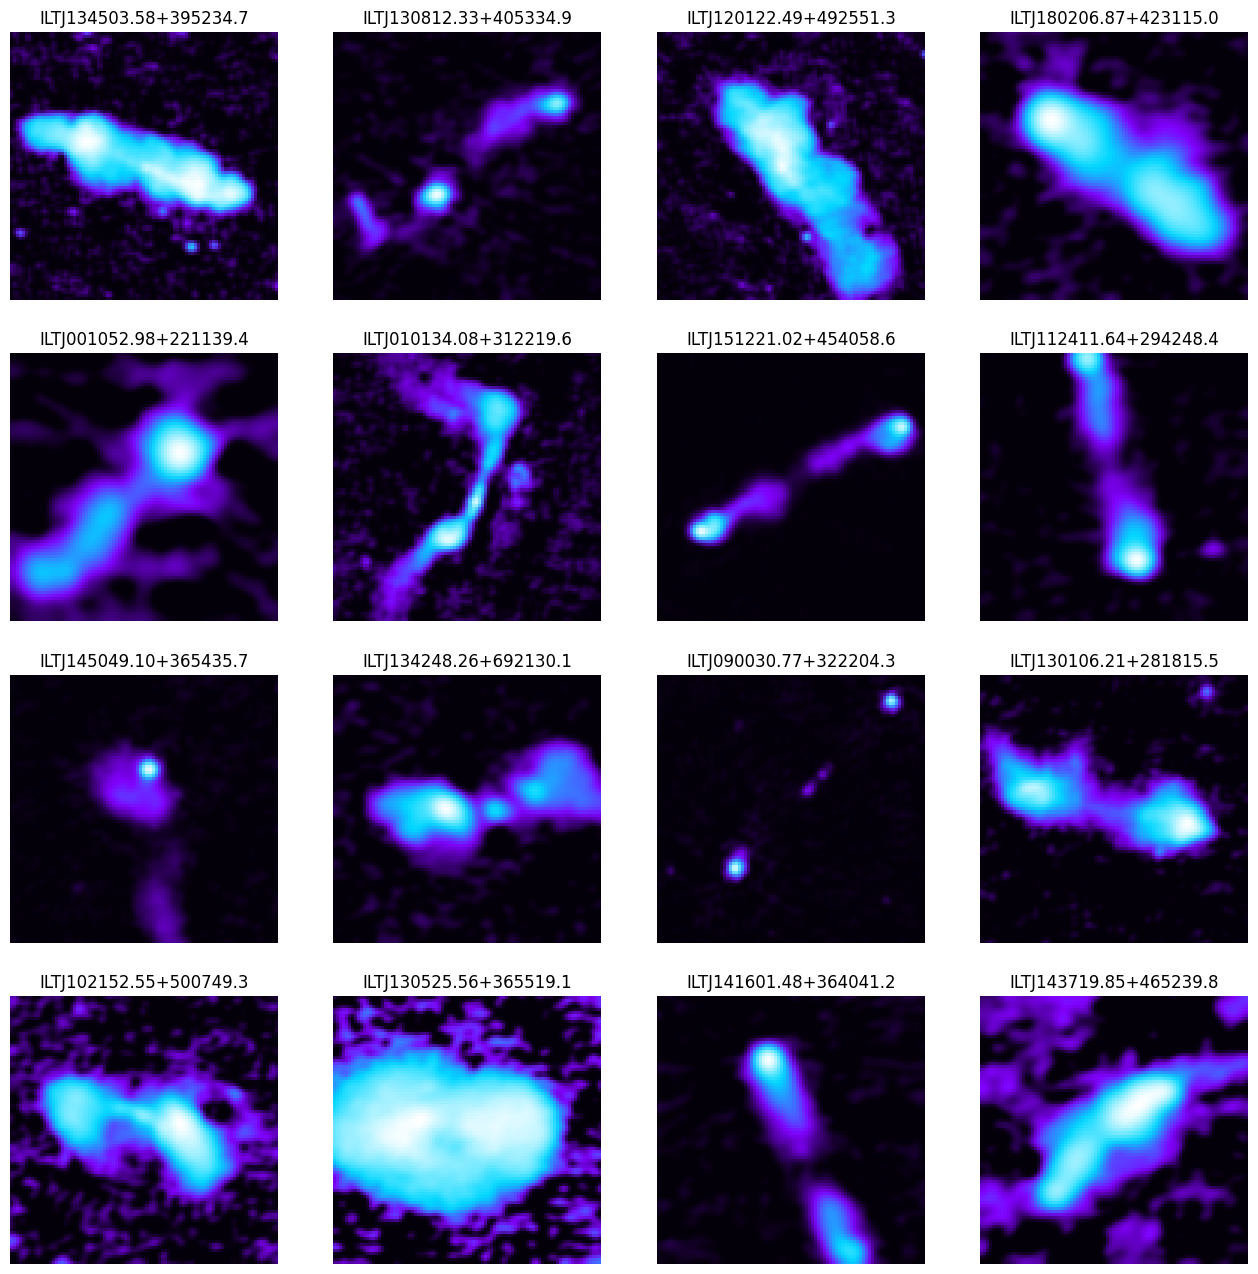

In [3]:
rd_idx = np.random.choice(n_images_cutouts_asinh, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath_cutouts_asinh}/{all_img[rd_idx[i]]}", 'r')
    title(all_img[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("LoTSS cutouts asinh")

(89, 89, 4)
LoTSS cutouts Linear


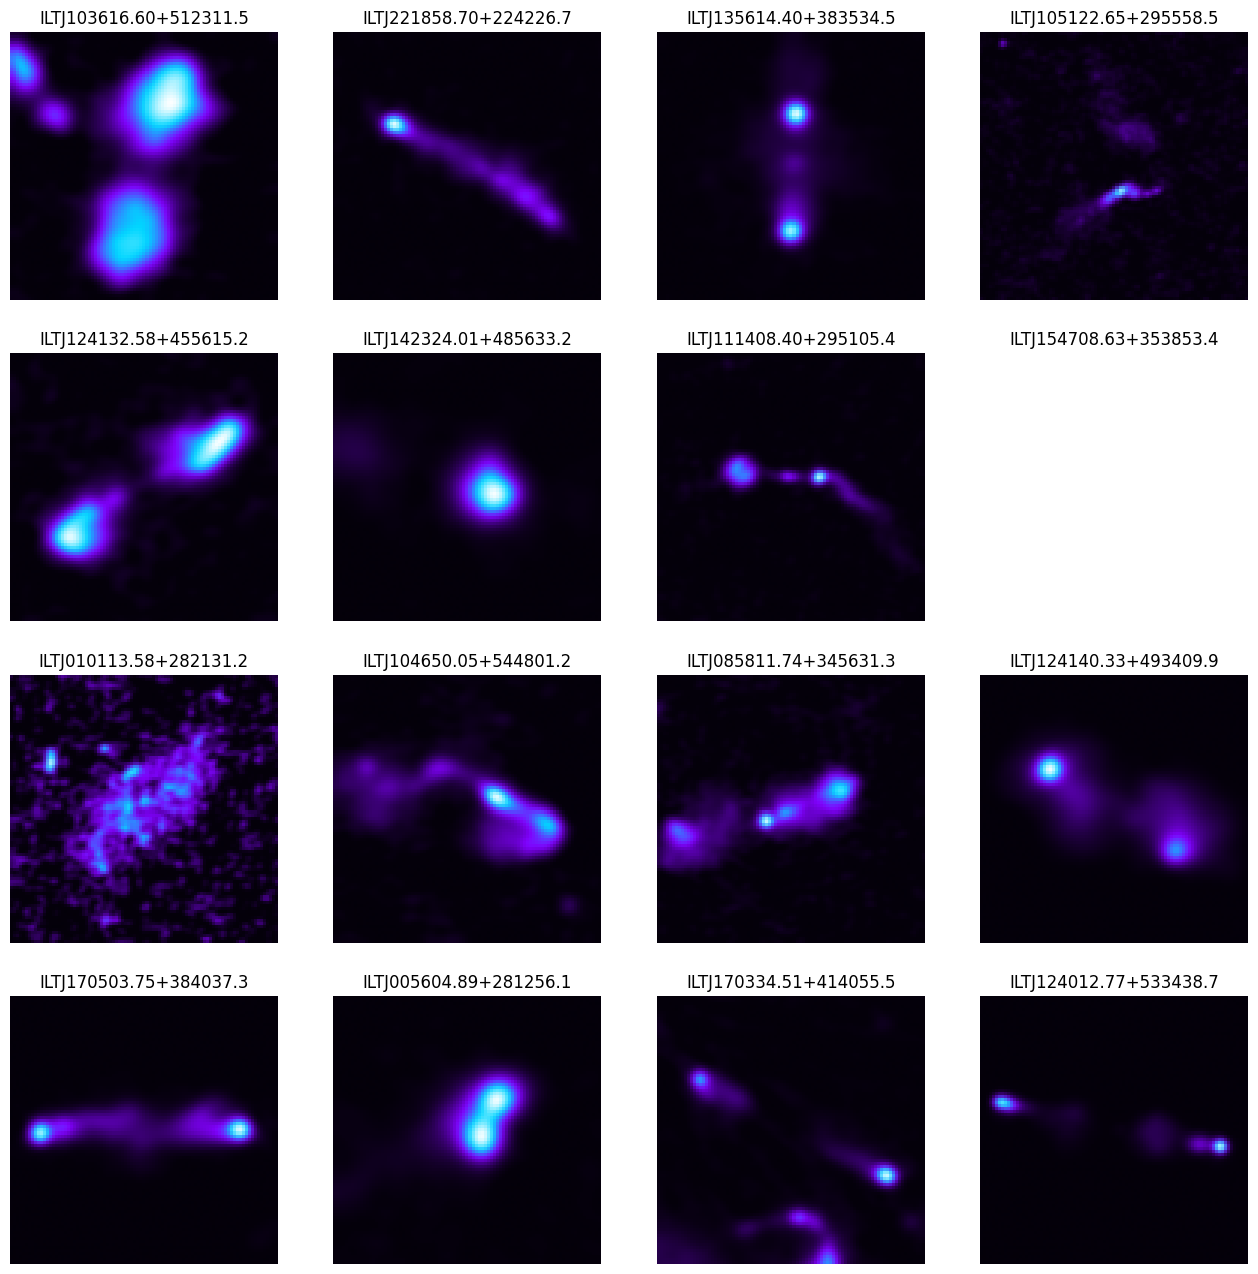

In [4]:
rd_idx = np.random.choice(n_images_cutouts_linear, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath_cutouts_linear}/{all_imgLoTSS_linear[rd_idx[i]]}", 'r')
    title(all_imgLoTSS_linear[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("LoTSS cutouts Linear")

rd_idx = np.random.choice(EMU_n_images_cutouts_asinh, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{EMU_imgpath_cutouts_asinh}/{all_imgEMU_asinh[rd_idx[i]]}", 'r')
    title(all_imgEMU_asinh[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("EMU cutouts asinh")

(89, 89, 4)
EMU cutouts linear


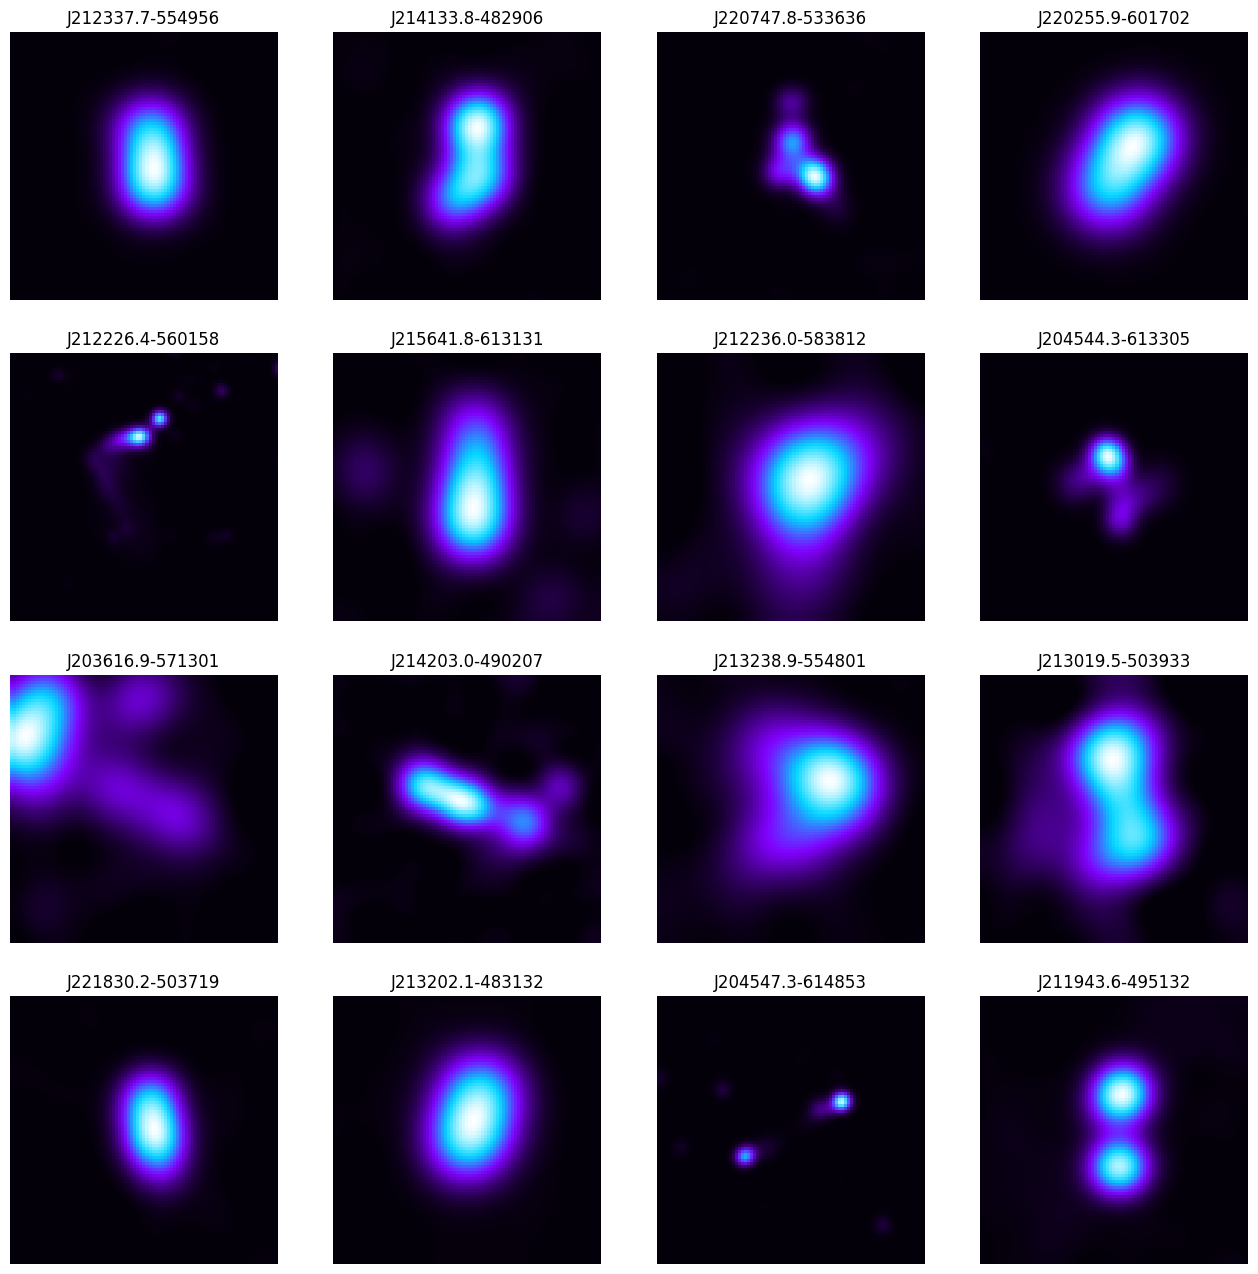

In [5]:
rd_idx = np.random.choice(EMU_n_images_cutouts_linear, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{EMU_imgpath_cutouts_linear}/{all_imgEMU_linear[rd_idx[i]]}", 'r')
    title(all_imgEMU_linear[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("EMU cutouts linear")

# Pre processing

In [6]:
!pwd

/users/ashley/road2SKA


In [7]:
data_csv = pd.read_csv("projectG_supervised_latent_radiogals/classifications_horton_et_al_2025_filtered.csv")

In [22]:
data_array = []
def PIL_to_image_array():
    source_names = sorted(list(data_csv["Source_Name"]))
    for source in source_names:
        img_path =  f"roadtoska/LoTTS_data/LoTSS_cutouts_asinh/{source}.png"
        image = Image.open(img_path)
        img_array = np.asarray(image)
        image_rgb = img_array[:, :, :3]  
        # print(f"RGB image: {image_rgb.shape}")
        image_gray = np.mean(image_rgb, axis=2).astype(np.uint8)
        # print(f"Gray image shape: {image_gray.shape}")  
        # imshow(image_gray, cmap="gray")
        # axis("off")
        # print(image_gray)
        data_array.append(image_gray)
    return np.stack(data_array, axis=0) 

In [23]:
x = PIL_to_image_array()

In [26]:
type(x)

numpy.ndarray